In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

C:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def wrangle(data):
    data=pd.read_csv(data)
    check=data.isnull().sum()
    print('the null values =' ,check)
    print("\n\n\n\n")
    data.fillna(data.mean,inplace=True)
    print("\n\n\n\n")
    print('data info =',data.info())
    print("\n\n\n\n")
    print('data describe is',data.describe())
    print("\n\n\n\n")
    return data

In [4]:
data=wrangle("D:\\faculty\\semester 6\\data computating\\project\\Cleaned-Data.csv")

the null values = Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64










<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------

In [5]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


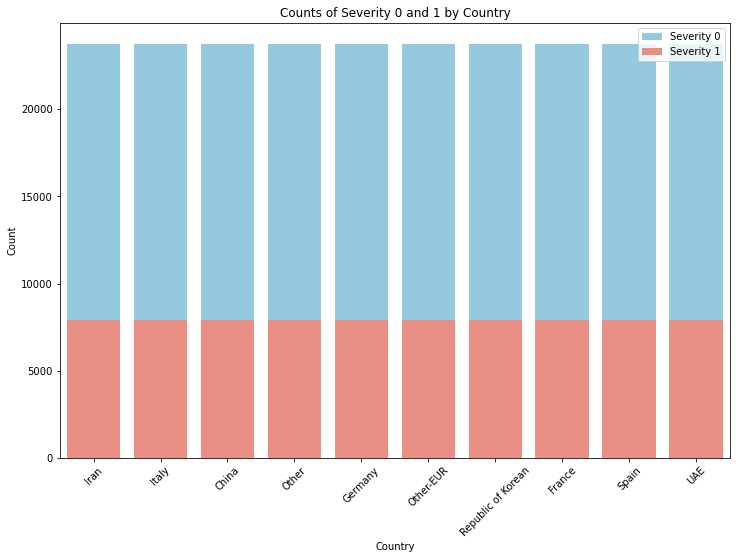

In [6]:
df1=data[['Country','Severity_Severe']]
df2=df1.value_counts()
df2=df2.to_frame()
df2.reset_index(inplace=True)

severity_0 = df2[df2['Severity_Severe'] == 0]
severity_1 = df2[df2['Severity_Severe'] == 1]

plt.figure(figsize=(12, 8))  

sns.barplot(x='Country', y=0, data=severity_0, color='skyblue', label='Severity 0')

sns.barplot(x='Country', y=0, data=severity_1, color='salmon', label='Severity 1')

plt.title('Counts of Severity 0 and 1 by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.legend()

plt.show()

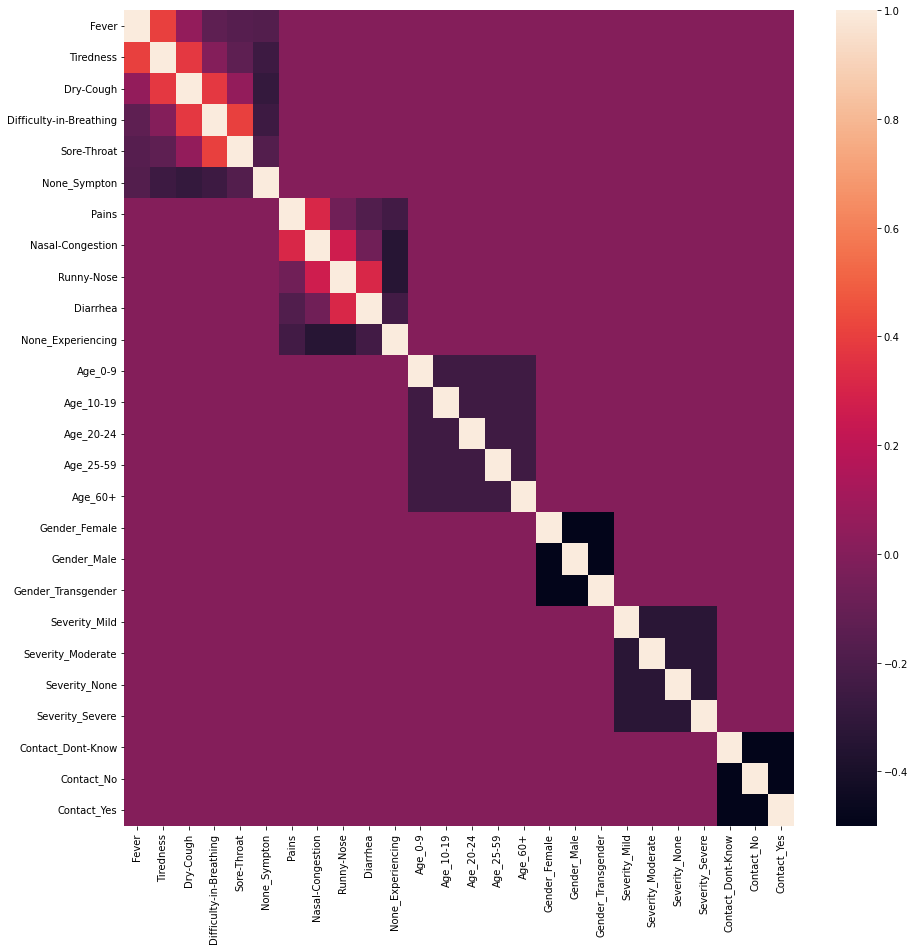

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr());

In [8]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


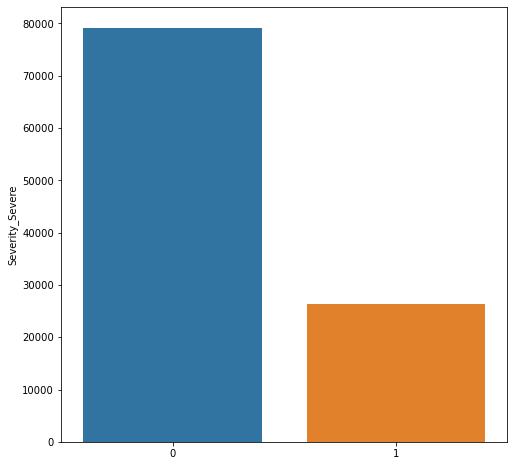

In [9]:
male=data[['Gender_Male','Severity_Severe']][data['Gender_Male']==1]
male=male['Severity_Severe'].value_counts()
male=male.to_frame()
plt.figure(figsize=(8,8))
sns.barplot(y='Severity_Severe',x=[0,1],data=male);

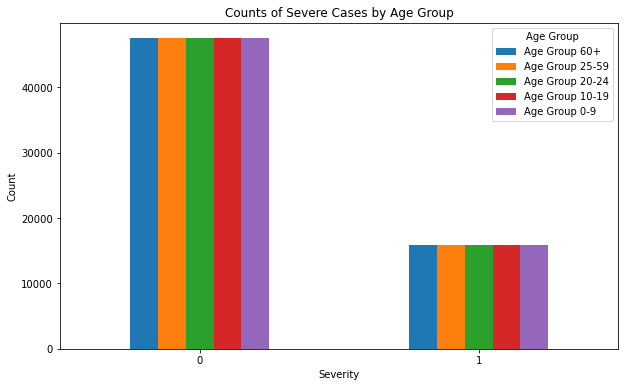

In [10]:
ages60 = data[data['Age_60+'] == 1]['Severity_Severe']
ages25 = data[data['Age_25-59'] == 1]['Severity_Severe']
ages20 = data[data['Age_20-24'] == 1]['Severity_Severe']
ages10 = data[data['Age_10-19'] == 1]['Severity_Severe']
ages0 = data[data['Age_0-9'] == 1]['Severity_Severe']

counts_ages60 = ages60.value_counts()
counts_ages25 = ages25.value_counts()
counts_ages20 = ages20.value_counts()
counts_ages10 = ages10.value_counts()
counts_ages0 = ages0.value_counts()

concatenated_counts = pd.concat([counts_ages60, counts_ages25, counts_ages20, counts_ages10, counts_ages0], axis=1)
concatenated_counts.columns = ['Age Group 60+', 'Age Group 25-59', 'Age Group 20-24', 'Age Group 10-19', 'Age Group 0-9']
concatenated_counts

concatenated_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Counts of Severe Cases by Age Group')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Age Group')
plt.show()

In [11]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


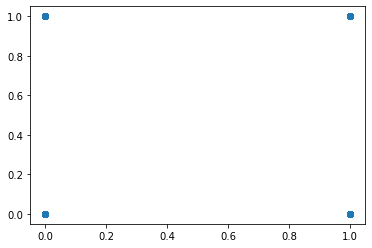

In [12]:
plt.scatter(data['Fever'],data['Severity_Severe'])

In [14]:
for d in [ 'Country']:
    encoder = preprocessing.LabelEncoder()
    data[d] = encoder.fit(data[d]).transform(data[d])
    

y = data['Severity_Severe']
X = data.drop('Severity_Severe', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (221760, 26)
y_train shape: (221760,)
X_test shape: (95040, 26)
y_test shape: (95040,)


the accuracy of each step =  [1. 1. 1. 1. 1.]


<AxesSubplot:>

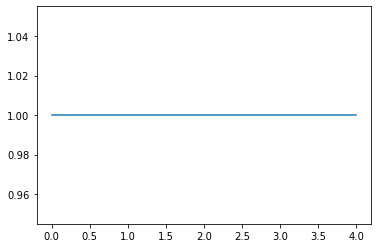

In [13]:

pipeline = Pipeline([
    ('pca', PCA(n_components=0.90)),
    ('svm', svm.SVC())
])
cv_acc_scores = cross_val_score(pipeline,X_train,y_train,cv=5,n_jobs=-1)
print('the accuracy of each step = ',cv_acc_scores)
cv_acc_scores=pd.Series(cv_acc_scores)
cv_acc_scores.plot(kind='line')


In [14]:
model = GaussianNB()
pipeline = Pipeline([
    ('rfe' ,RFE(model)),
    ('svm', svm.SVC())
])
params={
    'rfe__n_features_to_select':range(10,16)
}
model = GridSearchCV(
    pipeline,
    param_grid=params,cv=5,n_jobs=-1,verbose=1
)
model
model.fit(X_train,y_train)
cv_results = pd.DataFrame(model.cv_results_)


acc_test = model.score(X_test,y_test)
print("Test Accuracy:", round(acc_test, 4))
print('\n\n\n\n')
print('the dataframe of all steps :')
cv_results

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test Accuracy: 1.0





the dataframe of all steps :


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfe__n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.289502,3.303237,3.226003,0.492694,10,{'rfe__n_features_to_select': 10},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,24.383197,4.398832,4.140383,0.926088,11,{'rfe__n_features_to_select': 11},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,27.241225,0.619590,5.884787,0.725115,12,{'rfe__n_features_to_select': 12},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,263.078212,187.054126,5.392872,1.062195,13,{'rfe__n_features_to_select': 13},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,30.493216,2.091254,6.287487,0.890298,14,{'rfe__n_features_to_select': 14},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,55.269290,14.222303,6.835905,1.871717,15,{'rfe__n_features_to_select': 15},1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
